# This jupyter notebook is prepared by Tyler Beach for A1 EDA.

### 1. Run the block below to upload the dataset. (Note that the file list gets refreshed every time your runtime is disconnected. Simply run this when you return to upload the file again using the files API. Once you run, it should wait for you to upload the file. (1pt) 

In [24]:
from google.colab import files
uploaded = files.upload()

Saving startup_info_.csv to startup_info_ (2).csv


### 2. Import numpy, pandas, matplotlib.pyplot and seaborn packages. (2pt)
###### If you need additional packages, you can import it on the go in any code-block below.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Import the dataset into a pandas dataframe. Then report how many rows and columns are present in the dataset. (2pt)

In [26]:
df = pd.read_csv('startup_info_.csv')
print("Data set has " + str(len(df.axes[0])) + " rows and " + str(len(df.axes[1])) + " columns")

Data set has 923 rows and 28 columns


### 4. Call the describe method to see summary statistics of the numerical attribute columns. (1pt)

In [27]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,16.000000,1.000000


### 5.1 List all attribute columns (1pt)

In [28]:
print(df.columns)

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'category_code',
       'object_id', 'avg_participants', 'is_top500', 'status'],
      dtype='object')


## 5.2 The "Unnamed: 0","Unnamed: 6", "state_code.1" and "object_id" feature columns are not useful. Drop them in-place. (1pt) 

In [29]:
df.drop(["Unnamed: 0", "Unnamed: 6", "state_code.1", "object_id"], axis=1, inplace=True)
print(df)

    state_code   latitude   longitude zip_code       id           city  \
0           CA  42.358880  -71.056820    92101   c:6669      San Diego   
1           CA  37.238916 -121.973718    95032  c:16283      Los Gatos   
2           CA  32.901049 -117.192656    92121  c:65620      San Diego   
3           CA  37.320309 -122.050040    95014  c:42668      Cupertino   
4           CA  37.779281 -122.419236    94105  c:65806  San Francisco   
..         ...        ...         ...      ...      ...            ...   
918         CA  37.740594 -122.376471    94107  c:21343  San Francisco   
919         MA  42.504817  -71.195611     1803  c:41747     Burlington   
920         CA  37.408261 -122.015920    94089  c:31549      Sunnyvale   
921         CA  37.556732 -122.288378    94404  c:33198  San Francisco   
922         CA  37.386778 -121.966277    95054  c:26702    Santa Clara   

                     name  labels founded_at  closed_at  ...  \
0             Bandsintown       1   1/1/2007   

## 6.1 Show all the numeric columns and save it to a new dataframe. (2pt)

In [30]:
numdf = df.select_dtypes(include=np.number)
print(numdf)

      latitude   longitude  labels  age_first_funding_year  \
0    42.358880  -71.056820       1                  2.2493   
1    37.238916 -121.973718       1                  5.1260   
2    32.901049 -117.192656       1                  1.0329   
3    37.320309 -122.050040       1                  3.1315   
4    37.779281 -122.419236       0                  0.0000   
..         ...         ...     ...                     ...   
918  37.740594 -122.376471       1                  0.5178   
919  42.504817  -71.195611       0                  7.2521   
920  37.408261 -122.015920       0                  8.4959   
921  37.556732 -122.288378       1                  0.7589   
922  37.386778 -121.966277       1                  3.1205   

     age_last_funding_year  age_first_milestone_year  age_last_milestone_year  \
0                   3.0027                    4.6685                   6.7041   
1                   9.9973                    7.0055                   7.0055   
2           


## 6.2 Plot distributions of the numeric columns using histogram and record the skew of each distribution. (Note: positive value = right skewed, negative value = left skewed) (4pt)

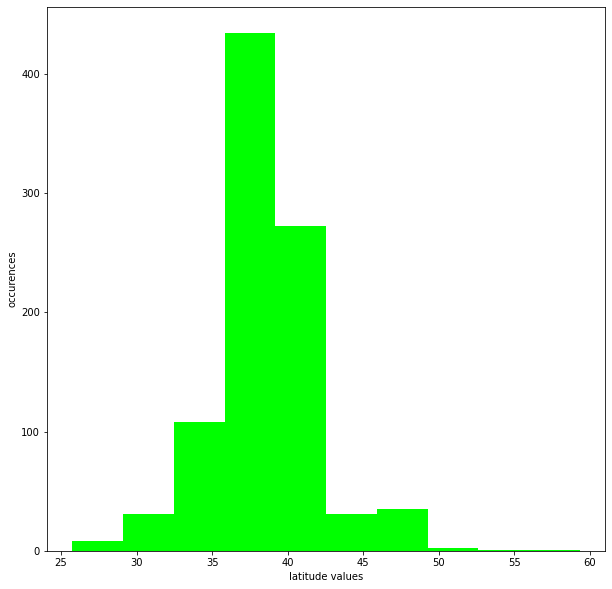

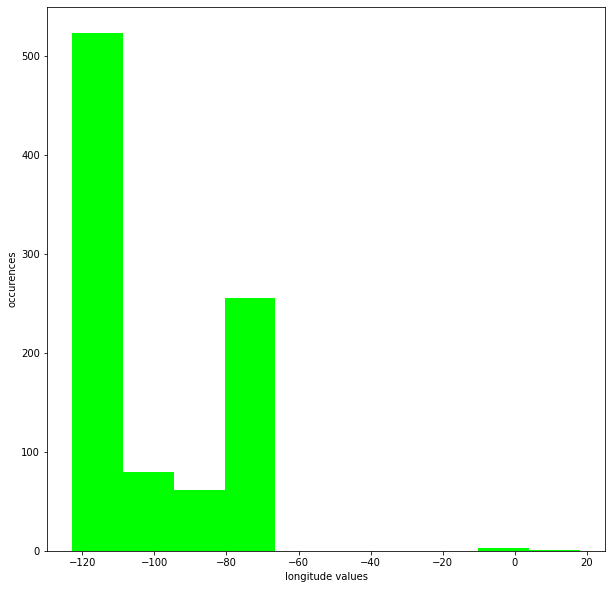

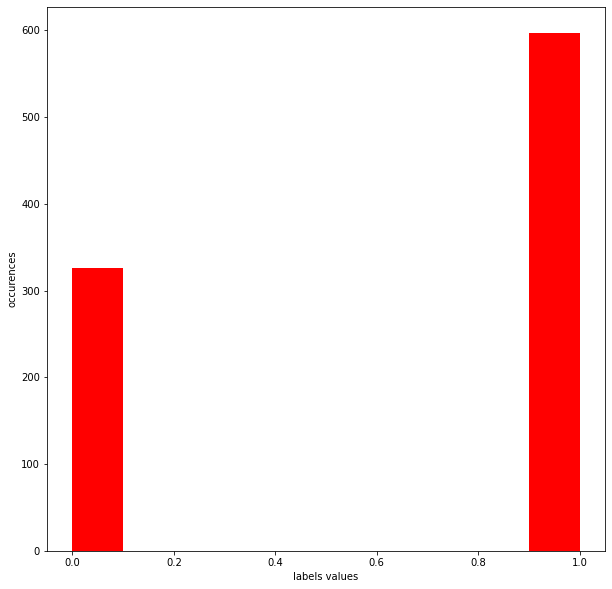

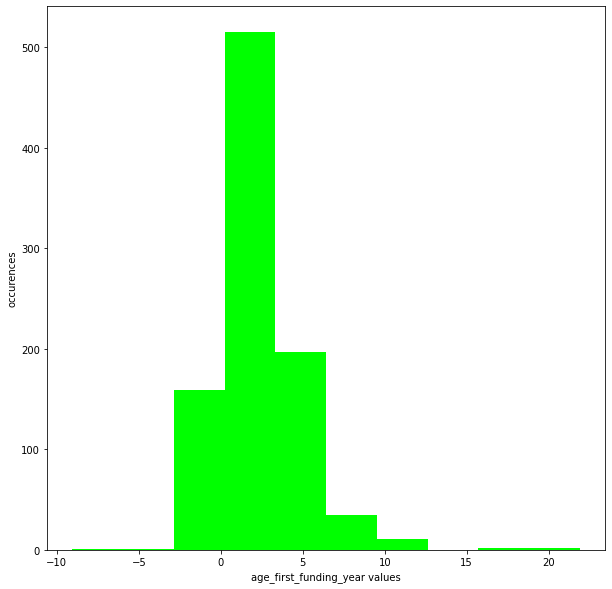

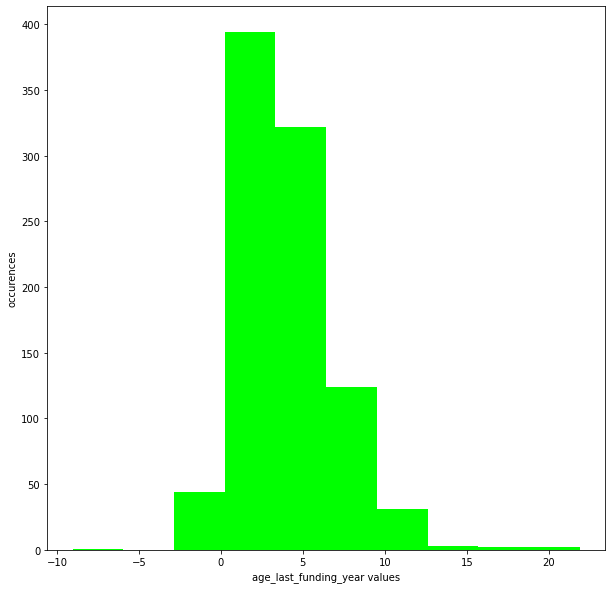

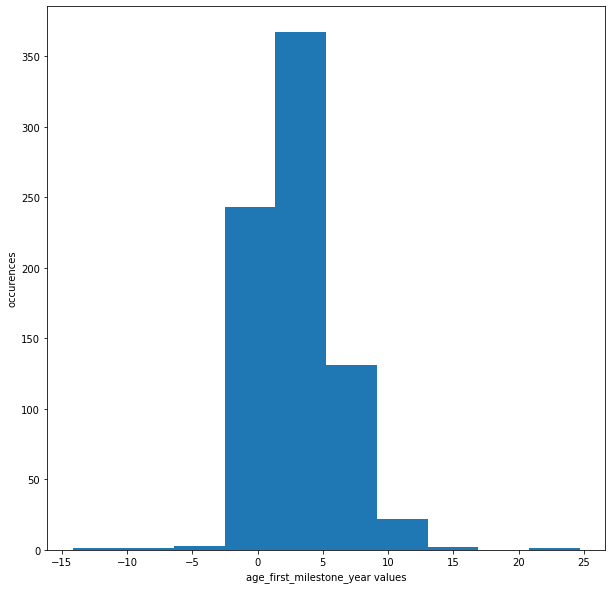

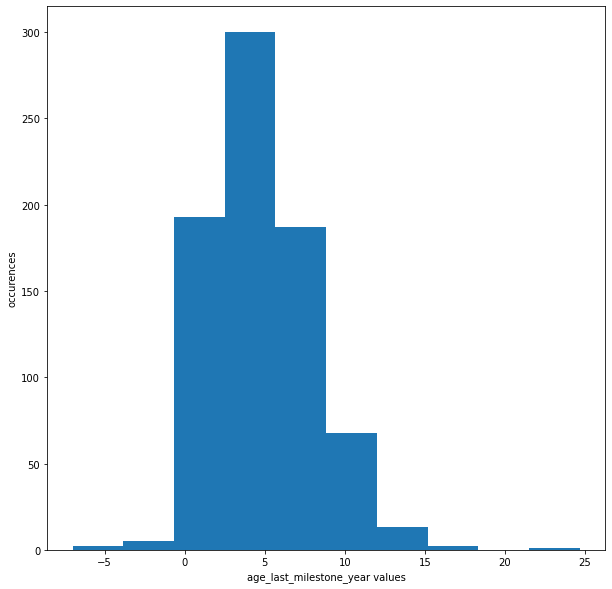

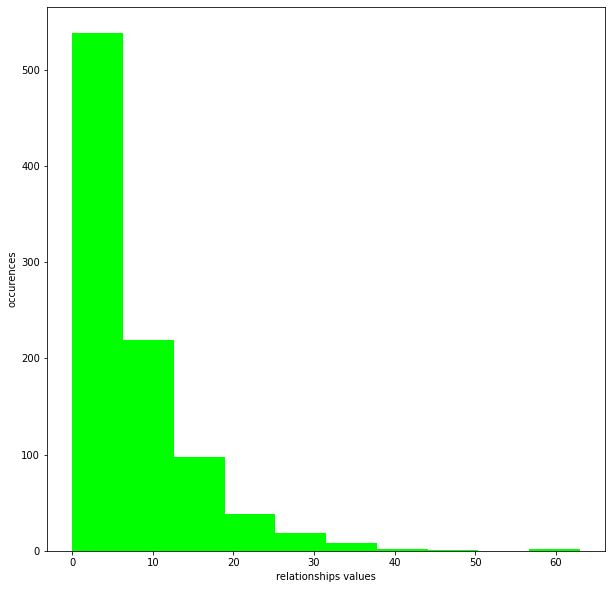

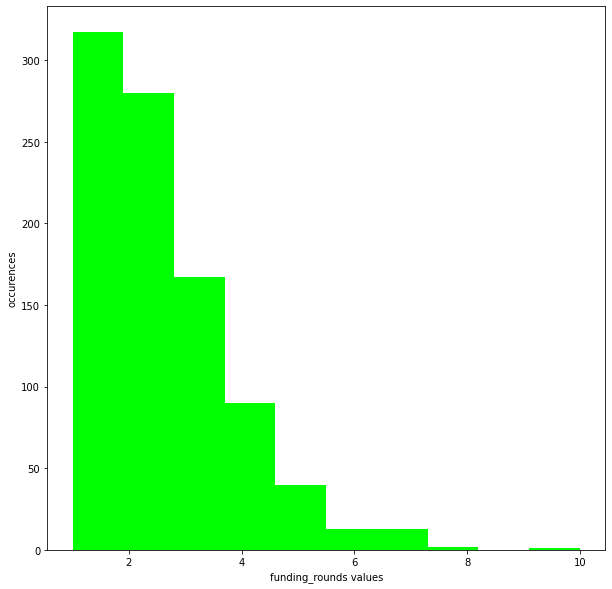

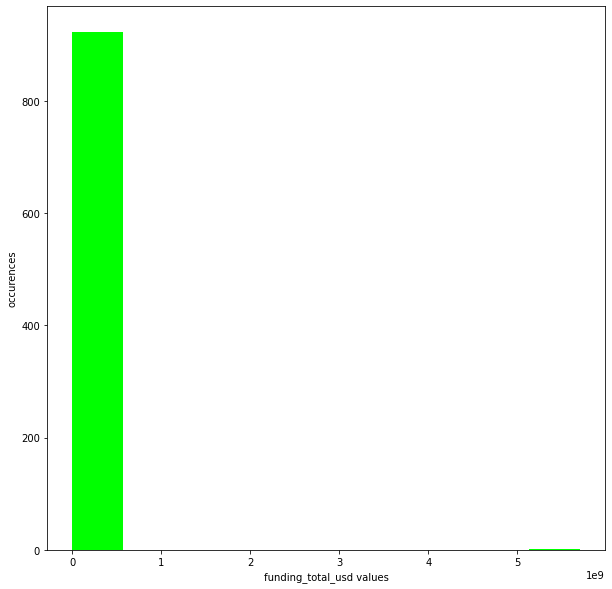

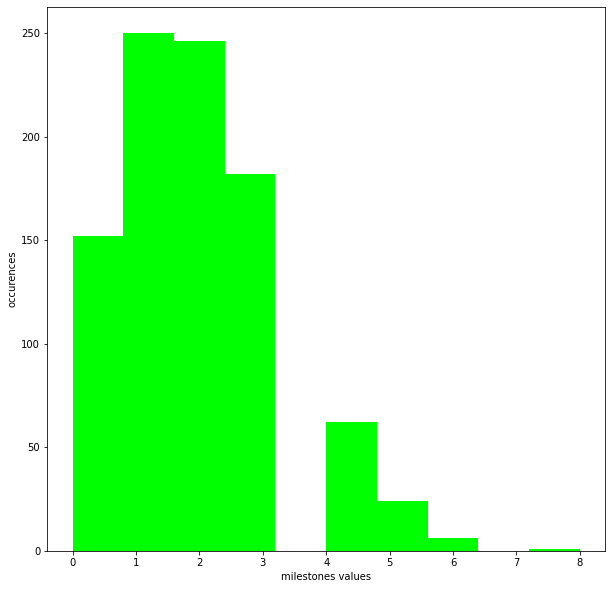

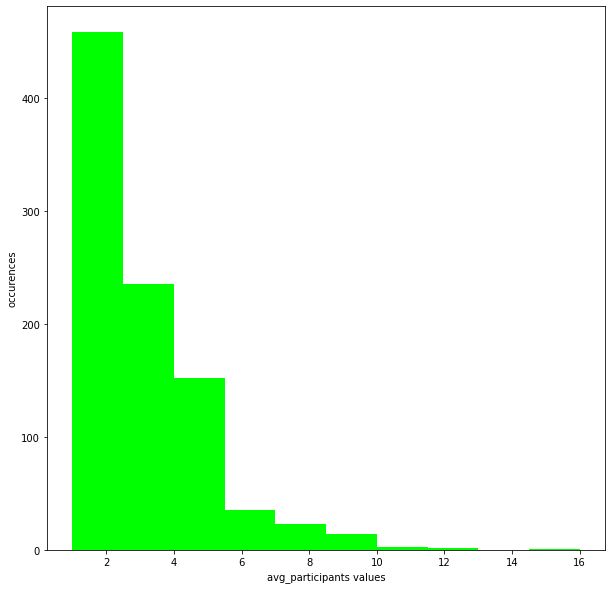

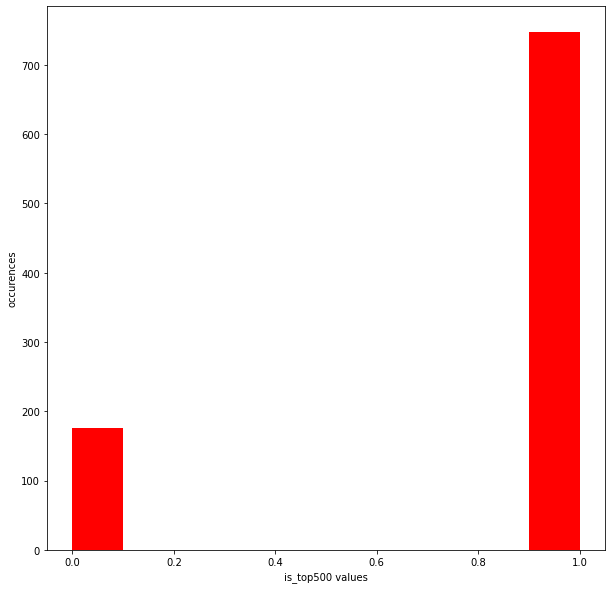

In [31]:
from scipy.stats import skew

for col in numdf.columns:
  skewness = skew(numdf[col])
  if(skewness < 0): #red for right
    plt.hist(numdf[col], color='red')
  elif(skewness > 0): #lime for left
    plt.hist(numdf[col], color='lime')
  else: #perfectly zero skew
    plt.hist(numdf[col])
  plt.xlabel(str(col) + " values")
  plt.ylabel("occurences")
  plt.show()


## 7. Show all the categorical columns and save it to a new dataframe. (2pt)

In [32]:
catdf = df.select_dtypes(exclude=np.number)
print(catdf)

    state_code zip_code       id           city                  name  \
0           CA    92101   c:6669      San Diego           Bandsintown   
1           CA    95032  c:16283      Los Gatos             TriCipher   
2           CA    92121  c:65620      San Diego                 Plixi   
3           CA    95014  c:42668      Cupertino     Solidcore Systems   
4           CA    94105  c:65806  San Francisco        Inhale Digital   
..         ...      ...      ...            ...                   ...   
918         CA    94107  c:21343  San Francisco               CoTweet   
919         MA     1803  c:41747     Burlington    Reef Point Systems   
920         CA    94089  c:31549      Sunnyvale       Paracor Medical   
921         CA    94404  c:33198  San Francisco               Causata   
922         CA    95054  c:26702    Santa Clara  Asempra Technologies   

    founded_at  closed_at first_funding_at last_funding_at category_code  \
0     1/1/2007        NaN         4/1/2009     

## 8. Examine missing values (2+2+3=7pt)

### 8.1 Show a list with column wise count of missing values and display the list in count wise descending order.

In [33]:
df.isnull().sum().sort_values(ascending=False)

closed_at                   588
age_last_milestone_year     152
age_first_milestone_year    152
state_code                    0
age_last_funding_year         0
is_top500                     0
avg_participants              0
category_code                 0
milestones                    0
funding_total_usd             0
funding_rounds                0
relationships                 0
age_first_funding_year        0
latitude                      0
last_funding_at               0
first_funding_at              0
founded_at                    0
labels                        0
name                          0
city                          0
id                            0
zip_code                      0
longitude                     0
status                        0
dtype: int64

### 8.2 Show columnwise percentage of missing values.

In [34]:
df.isnull().mean().sort_values(ascending=False)

closed_at                   0.637053
age_last_milestone_year     0.164680
age_first_milestone_year    0.164680
state_code                  0.000000
age_last_funding_year       0.000000
is_top500                   0.000000
avg_participants            0.000000
category_code               0.000000
milestones                  0.000000
funding_total_usd           0.000000
funding_rounds              0.000000
relationships               0.000000
age_first_funding_year      0.000000
latitude                    0.000000
last_funding_at             0.000000
first_funding_at            0.000000
founded_at                  0.000000
labels                      0.000000
name                        0.000000
city                        0.000000
id                          0.000000
zip_code                    0.000000
longitude                   0.000000
status                      0.000000
dtype: float64

### 8.3 Display a bar plot to visualize only the columns with missing values and their percentage count.

Text(0, 0.5, 'Percent missing')

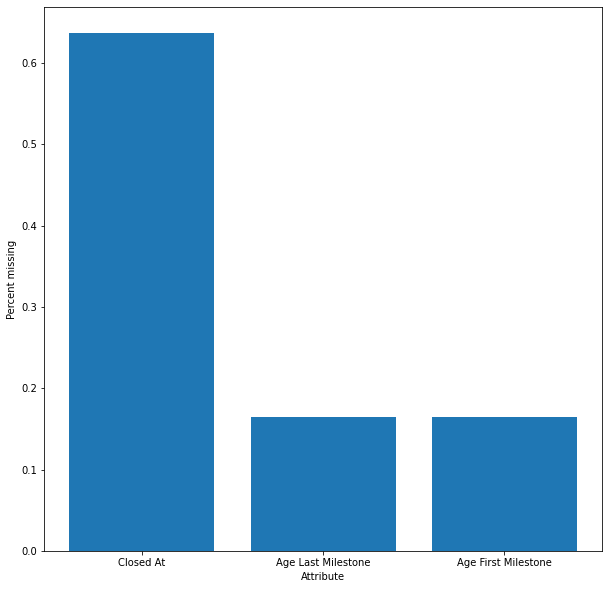

In [35]:
x = ["Closed At", "Age Last Milestone", "Age First Milestone"]
y = [df["closed_at"].isnull().mean(), df["age_last_milestone_year"].isnull().mean(), df["age_first_milestone_year"].isnull().mean()]

plt.bar(x, y)
plt.xlabel("Attribute")
plt.ylabel("Percent missing")

## 9. Label Encoding : Copy the dataframe to a new one. Then using scikitlearn's Label Encoder, transform the "status" column to 0-1. (5pt)

In [36]:
finaldf = df.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
finaldf["status"] = le.fit_transform(finaldf["status"])
print(finaldf)

    state_code   latitude   longitude zip_code       id           city  \
0           CA  42.358880  -71.056820    92101   c:6669      San Diego   
1           CA  37.238916 -121.973718    95032  c:16283      Los Gatos   
2           CA  32.901049 -117.192656    92121  c:65620      San Diego   
3           CA  37.320309 -122.050040    95014  c:42668      Cupertino   
4           CA  37.779281 -122.419236    94105  c:65806  San Francisco   
..         ...        ...         ...      ...      ...            ...   
918         CA  37.740594 -122.376471    94107  c:21343  San Francisco   
919         MA  42.504817  -71.195611     1803  c:41747     Burlington   
920         CA  37.408261 -122.015920    94089  c:31549      Sunnyvale   
921         CA  37.556732 -122.288378    94404  c:33198  San Francisco   
922         CA  37.386778 -121.966277    95054  c:26702    Santa Clara   

                     name  labels founded_at  closed_at  ...  \
0             Bandsintown       1   1/1/2007   

## 10. Correlation: Use seaborn's heatmap to visualize the correlation between numeric features. (3pt)

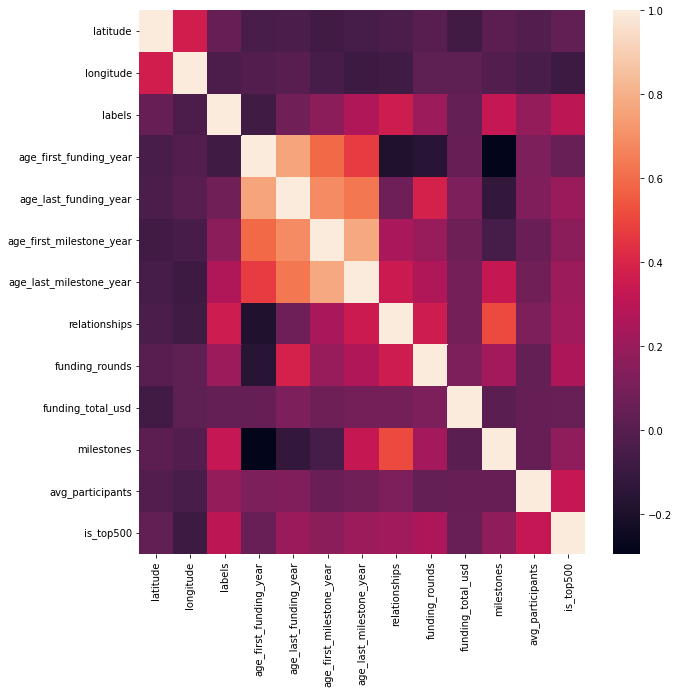

In [37]:
corr = numdf.corr()
sns.heatmap(corr)


## 11.1 Use seaborn's countplot to visualize relationship between "*state_code*" and "*labels*". Comment on which state produced majority of successful startups (3pt)

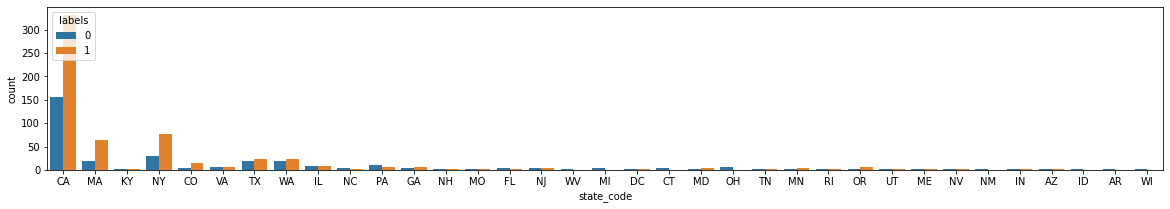

In [38]:
plt.rcParams["figure.figsize"] = (20,3)
sns.countplot(data=finaldf, x="state_code", hue="labels")

# 0 represents acquired and 1 represents closed.
# California very clearly has the majority of successful startups.

## 11.2 Use seaborn's countplot to visualize relationship between "*milestones*" and "*labels*". Comment on which milestone made the statistically highest number of successful startups (3pt)

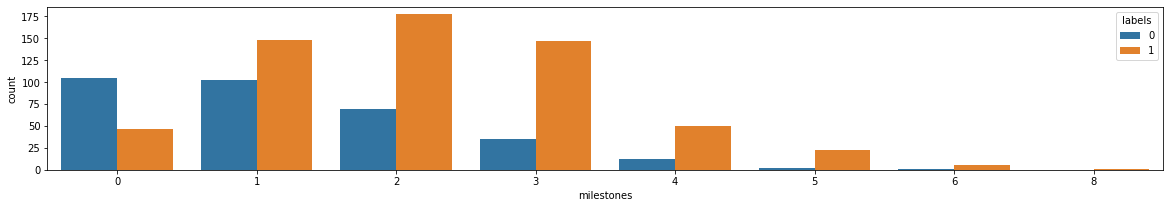

In [39]:
plt.rcParams["figure.figsize"] = (20,3)
sns.countplot(data=finaldf, x="milestones", hue="labels")

# Milestone 0 just narrowly made the statistically highest number of successful startups.

## 12. Drop features with duplicate values in-place, then show dataframe's new shape. (1pt)

In [40]:
finaldf.drop_duplicates(keep=False, inplace=True)
finaldf.shape

(923, 24)

## 13. From correlation heatmap above, comment on which feature has the highest correlation with "*funding_rounds*". Visualize a scatterplot with that and "*funding_rounds*". (3+3 = 6pt)

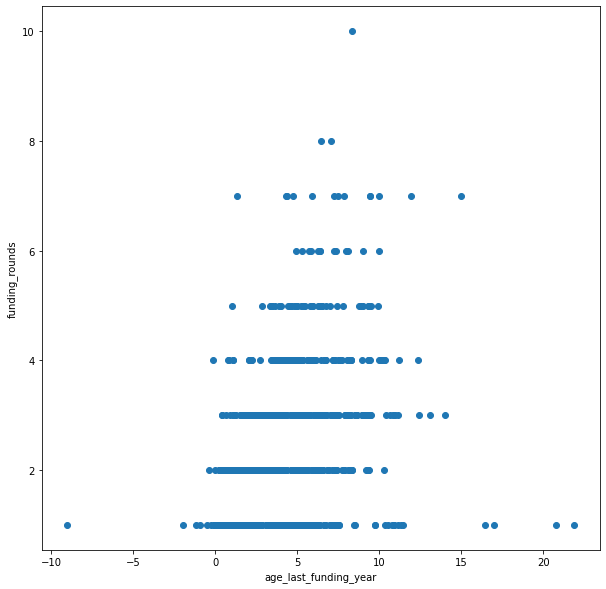

In [44]:
# The feature with the highest correlation with funding_rounds appears to be age_last_funding_year.
plt.scatter(df["age_last_funding_year"], df["funding_rounds"])
plt.xlabel("age_last_funding_year")
plt.ylabel("funding_rounds")
plt.show()


## 14. Show boxplots for the numeric features to detect outliers. (4pt)

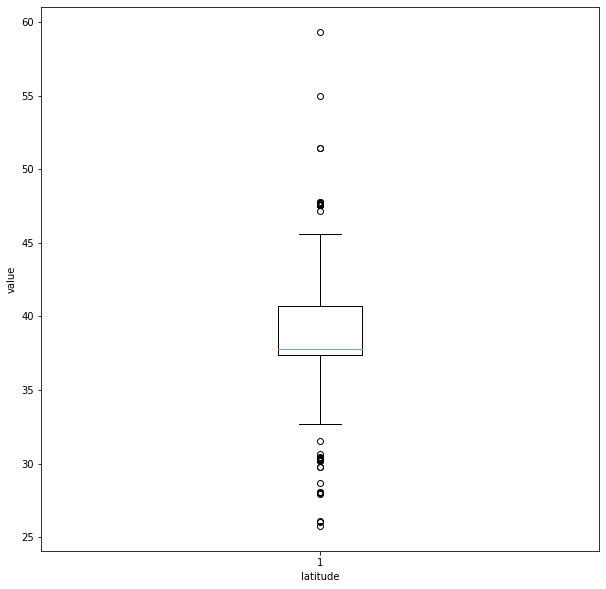

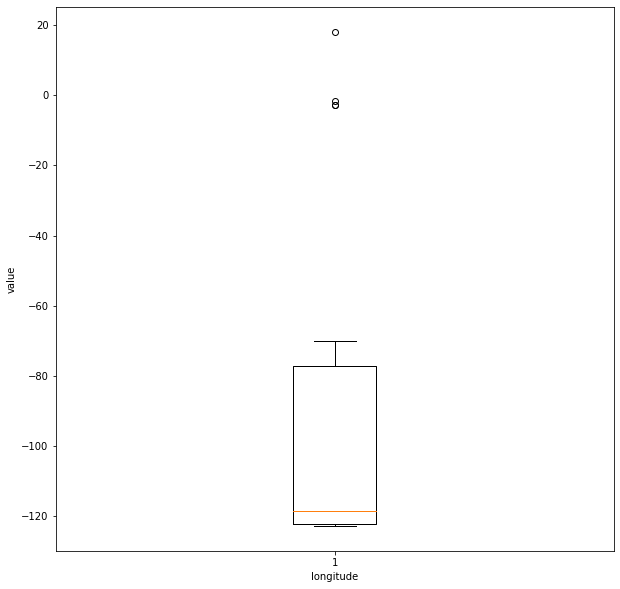

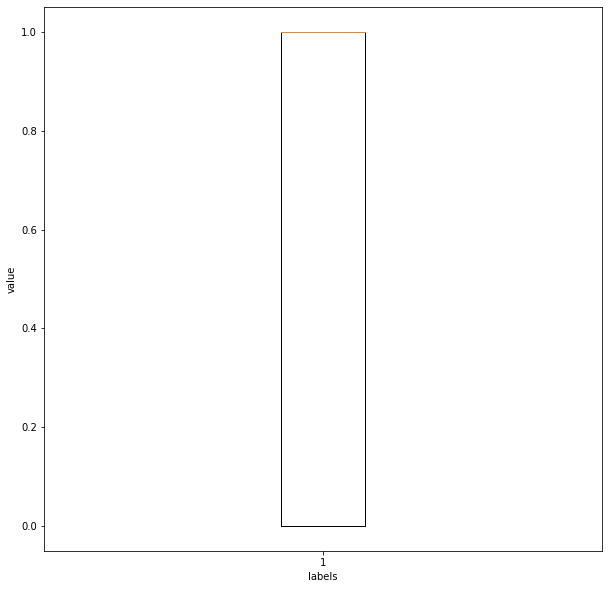

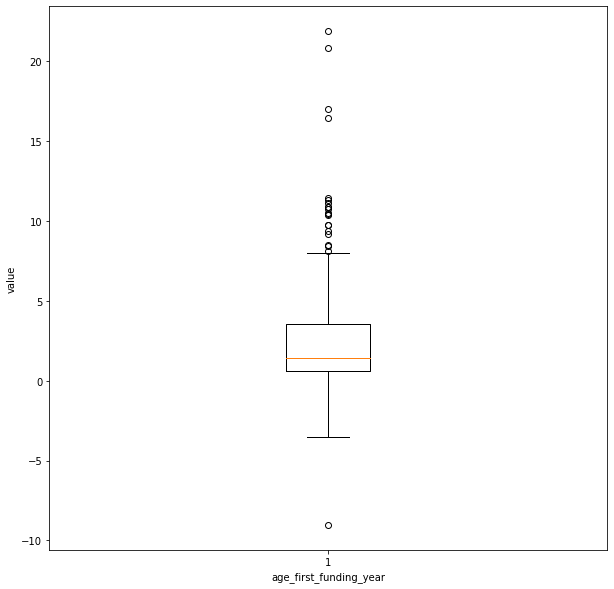

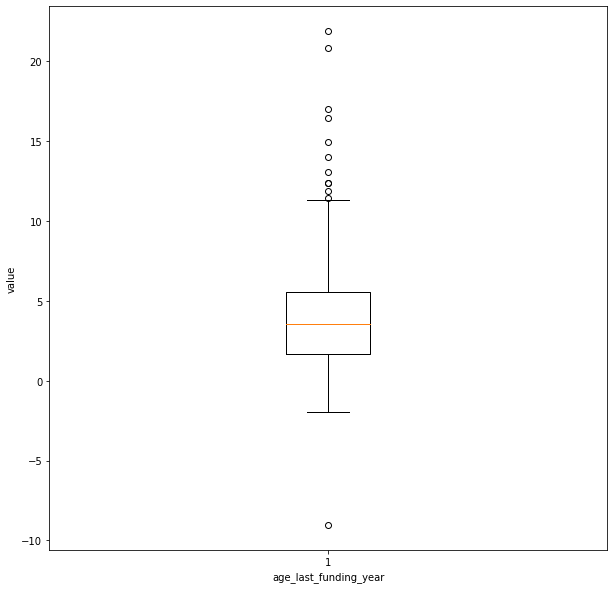

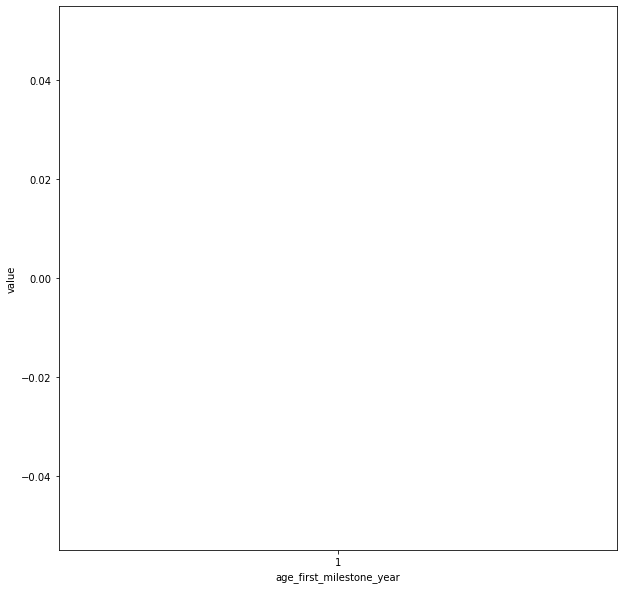

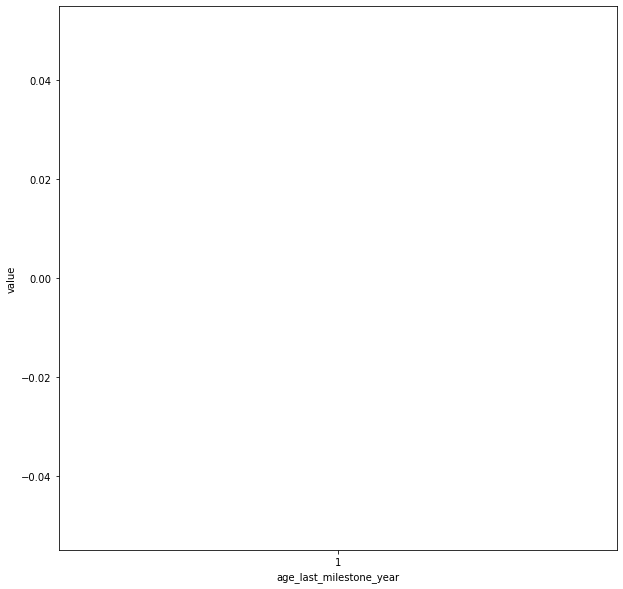

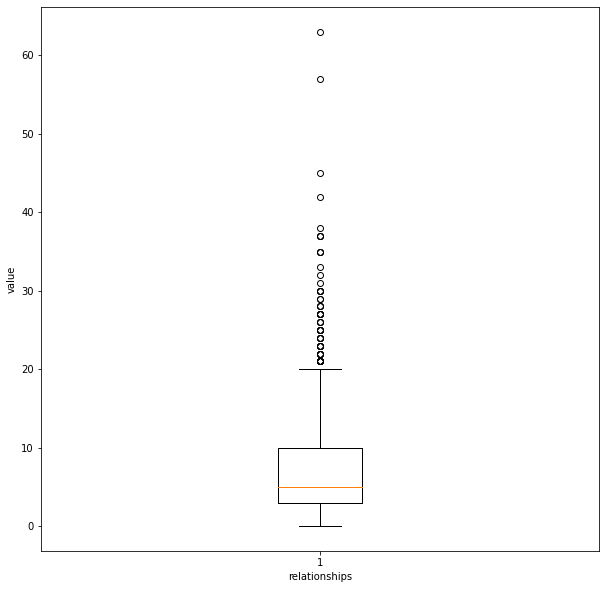

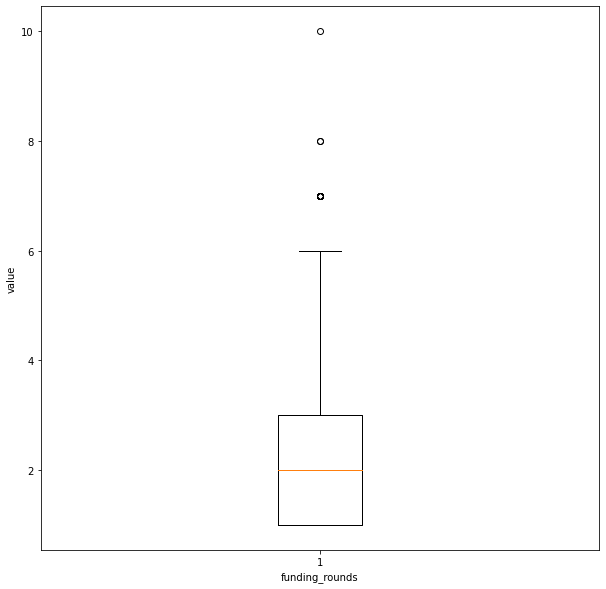

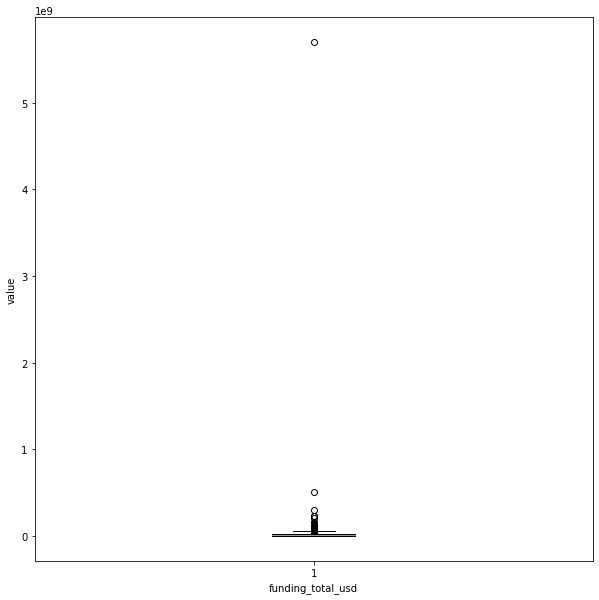

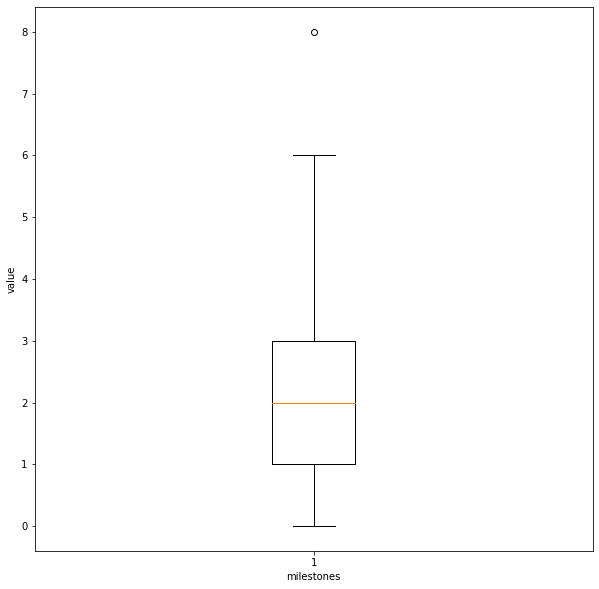

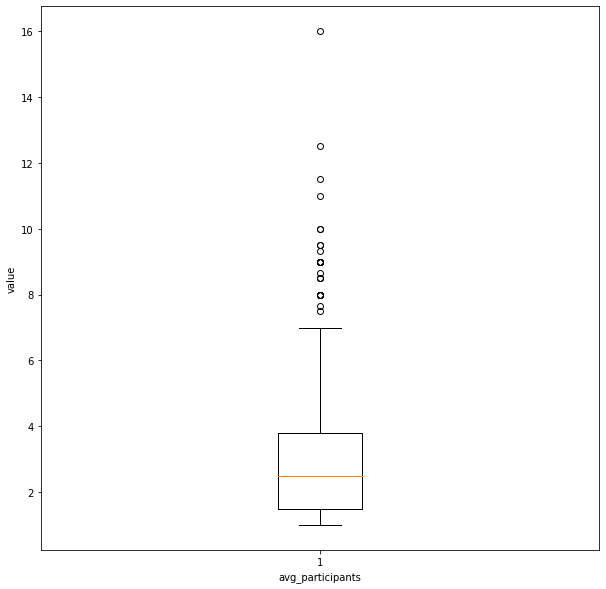

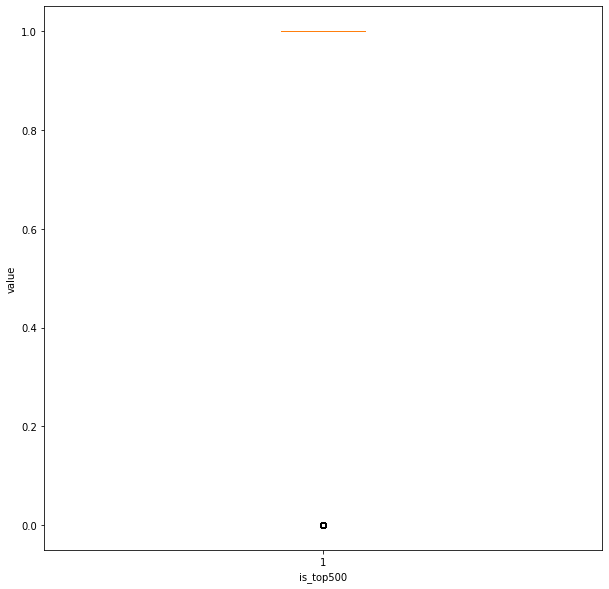

In [42]:
for col in numdf.columns:
  plt.rcParams["figure.figsize"] = (10,10)
  plt.boxplot(numdf[col], meanline=True)
  plt.xlabel(str(col))
  plt.ylabel("value")
  plt.show()

## 15. Summary and Discussion: Mention what additional steps are required to use this dataset in a binary classifier. Eg: any column to remove, any record to remove, any distribution to rebalance, any features to be joined together to generate new feature etc. (2pt)

#####We already have a binary way of indicating whether a startup was successful or not, in the "status" column. We even modified the column to hold 0's and 1's. It would probably be wise to remove records with missing info (or perhaps fill them in with predicted values based on the other attributes). Some of the data, beyond the plain duplicates we were instructed to remove, may have been slightly redundant: for example, we may not need the city if we already have the state. One could determine the state from the given city, or maybe decide they decide they don't need the city at all. That could trim down the amount of variables being considered and perhaps find stronger correlations between the startup's success and other (and more relevant) attributes.